# Image Interpolation

This notebook demonstrates how to interpolate PIL Image objects in t-prompts.

When you include images in your prompts, they cannot be rendered to plain text. Instead, you access them directly through the prompt structure.

In [1]:
from PIL import Image

from t_prompts import ImageInterpolation, ImageRenderError, prompt

## Loading an Image

First, let's load the warps-and-wefts image from the assets folder:

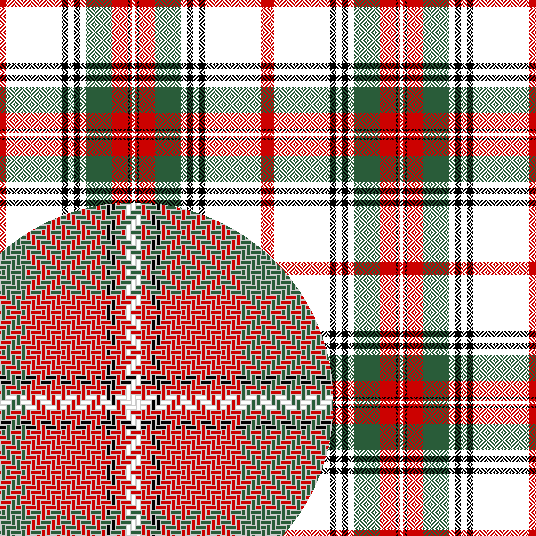

In [2]:
# Load the image
img = Image.open("../assets/warps-and-wefts.png")

# Display it
img

## Creating a Prompt with an Image

Now let's create a structured prompt that includes this image:

In [3]:
# Create a prompt with an image interpolation
instructions = "Describe what you see in this image"
p = prompt(t"{instructions:inst}\nImage: {img:image}")

# The prompt is created successfully
print(f"Prompt has {len(p)} interpolations")
print(f"Keys: {list(p.keys())}")

Prompt has 2 interpolations
Keys: ['inst', 'image']


## Accessing the Image

You can access the image through the prompt structure:

In [4]:
# Access the image interpolation node
image_node = p['image']

# Check that it's an ImageInterpolation
print(f"Node type: {type(image_node).__name__}")
print(f"Is ImageInterpolation: {isinstance(image_node, ImageInterpolation)}")

# Access the image value
retrieved_img = image_node.value
print(f"Image size: {retrieved_img.size}")
print(f"Image mode: {retrieved_img.mode}")

Node type: ImageInterpolation
Is ImageInterpolation: True
Image size: (536, 536)
Image mode: RGB


## Rendering to Text Raises an Error

Attempting to render a prompt containing images to text will raise an `ImageRenderError`:

In [5]:
# Try to render to text
try:
    rendered = str(p)
    print(f"Unexpected success: {rendered}")
except ImageRenderError as e:
    print(f"Expected error: {e}")
    print("\nError message explains how to access images:")
    print(f"  {str(e)}")

Expected error: Cannot render prompt containing images to text. Prompts with images can only be accessed through the prompt structure. Use p['image_key'].value to access the PIL Image object directly.

Error message explains how to access images:
  Cannot render prompt containing images to text. Prompts with images can only be accessed through the prompt structure. Use p['image_key'].value to access the PIL Image object directly.


## Provenance and Metadata

Image interpolations preserve full provenance information:

Expression: img
Key: image
Format spec: image
Index: 3


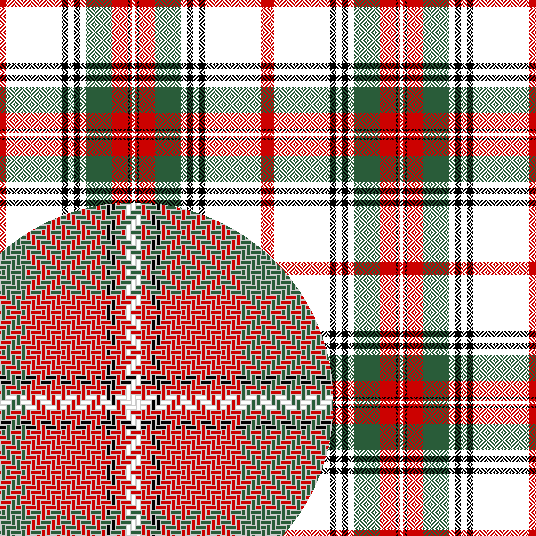

In [6]:
# Access metadata
print(f"Expression: {image_node.expression}")
print(f"Key: {image_node.key}")
print(f"Format spec: {image_node.format_spec}")
print(f"Index: {image_node.index}")

# Display the image again from the node
image_node.value

## Practical Use Case

Here's a more realistic example of how you might use image interpolation with multimodal LLM APIs:

In [7]:
# Create a structured prompt for vision analysis
system_msg = "You are a helpful assistant that analyzes images."
task = "Identify the textile pattern in this image and describe its characteristics."

p = prompt(t"""
{system_msg:system}

Task: {task:task}

Image to analyze:
{img:pattern_image}
""", dedent=True)

# You would then send this to a multimodal LLM API
# The API would need to extract text parts and image parts separately

# Access text interpolations
print("Text interpolations:")
for key in p.keys():
    node = p[key]
    if isinstance(node, ImageInterpolation):
        print(f"  {key}: <Image {node.value.size}>")
    else:
        print(f"  {key}: {node.value[:50]}..." if len(node.value) > 50 else f"  {key}: {node.value}")

Text interpolations:
  system: You are a helpful assistant that analyzes images.
  task: Identify the textile pattern in this image and des...
  pattern_image: <Image (536, 536)>


## Mixed Content Prompts

You can mix text and images freely in your prompts:

In [8]:
# Create a prompt with multiple images and text
context = "Textile pattern analysis"
img2 = img.copy()  # Using same image for demo

p = prompt(t"""
Context: {context:ctx}

Compare these two patterns:
Pattern A: {img:pattern_a}
Pattern B: {img2:pattern_b}

Provide a detailed comparison.
""", dedent=True)

# Access all interpolations
print(f"Total interpolations: {len(list(p.keys()))}")
for key in p.keys():
    node = p[key]
    if isinstance(node, ImageInterpolation):
        print(f"  {key}: Image ({node.value.size})")
    else:
        print(f"  {key}: Text")

Total interpolations: 3
  ctx: Text
  pattern_a: Image ((536, 536))
  pattern_b: Image ((536, 536))


## Summary

Key points about image interpolation:

1. **Installation**: Requires the `image` extra: `pip install t-prompts[image]`
2. **Creation**: Simply interpolate PIL Image objects like any other value
3. **Access**: Use `p['key'].value` to retrieve the image
4. **No text rendering**: Attempting `str(p)` or `p.render()` raises `ImageRenderError`
5. **Type checking**: Use `isinstance(node, ImageInterpolation)` to identify image nodes
6. **Provenance**: Full metadata (expression, key, format_spec) is preserved
7. **Mixed content**: Text and images can be freely mixed in prompts